In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import japanize_matplotlib

In [12]:
# 3000x3000の座標平面を作成
x = np.linspace(0, 3000, 3000)
y = np.linspace(0, 3000, 3000)
X, Y = np.meshgrid(x, y)

# 電波発信端末の座標とGMMのパラメータを設定
transmitter_1 = [500, 500]  # 端末1の平均 (中心座標)
transmitter_2 = [2500, 2500]  # 端末2の平均 (中心座標)

covariance_matrix_1 = [[500000, 0], [0, 500000]]  # 端末1の共分散行列
covariance_matrix_2 = [[500000, 0], [0, 500000]]  # 端末2の共分散行列

In [13]:
# 各発信端末のガウス分布を計算
rv1 = multivariate_normal(mean=transmitter_1, cov=covariance_matrix_1)
rv2 = multivariate_normal(mean=transmitter_2, cov=covariance_matrix_2)

# 各座標点での確率密度関数を計算
Z1 = rv1.pdf(np.dstack((X, Y)))
Z2 = rv2.pdf(np.dstack((X, Y)))


# 確率密度をRSSI値に変換
# RSSIの範囲を設定
RSSI_max = -30  # dBm
RSSI_min = -90  # dBm

# Z1とZ2の最大値
Z1_max = np.max(Z1)
Z2_max = np.max(Z2)

# 確率密度をRSSIにスケーリング
# 確率密度のグラデーションをそのままRSSI値に変換
RSSI1 = RSSI_min + (Z1 / Z1_max) * (RSSI_max - RSSI_min)
RSSI2 = RSSI_min + (Z2 / Z2_max) * (RSSI_max - RSSI_min)

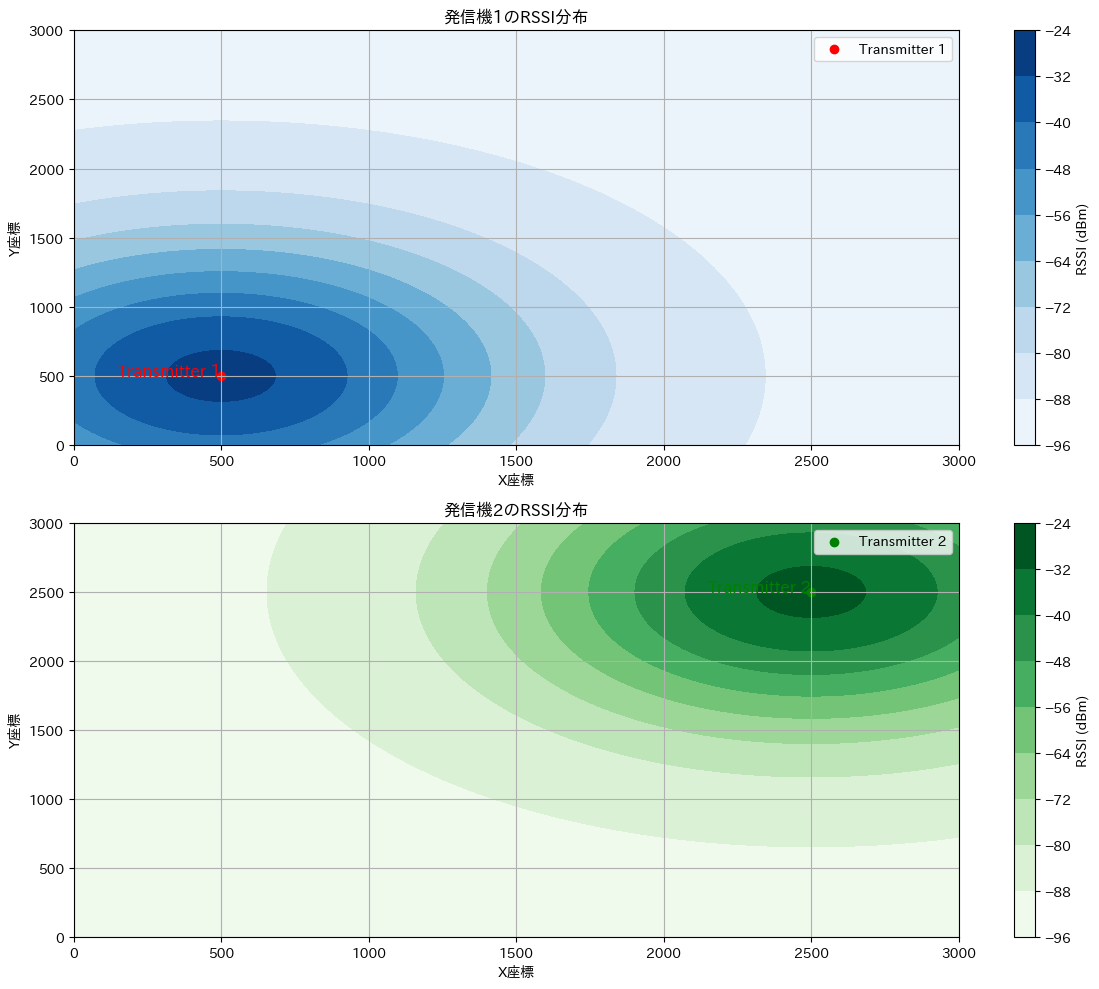

In [14]:
# プロット
plt.figure(figsize=(12, 10))

# 発信機1のRSSI分布をプロット
plt.subplot(2, 1, 1)
plt.contourf(X, Y, RSSI1, cmap="Blues")
plt.colorbar(label="RSSI (dBm)")
plt.scatter(
    transmitter_1[0], transmitter_1[1], color="red", marker="o", label="Transmitter 1"
)
plt.text(
    transmitter_1[0],
    transmitter_1[1],
    "Transmitter 1",
    color="red",
    fontsize=12,
    ha="right",
)
plt.xlabel("X座標")
plt.ylabel("Y座標")
plt.title("発信機1のRSSI分布")
plt.legend()
plt.grid(True)

# 発信機2のRSSI分布をプロット
plt.subplot(2, 1, 2)
plt.contourf(X, Y, RSSI2, cmap="Greens")
plt.colorbar(label="RSSI (dBm)")
plt.scatter(
    transmitter_2[0], transmitter_2[1], color="green", marker="o", label="Transmitter 2"
)
plt.text(
    transmitter_2[0],
    transmitter_2[1],
    "Transmitter 2",
    color="green",
    fontsize=12,
    ha="right",
)
plt.xlabel("X座標")
plt.ylabel("Y座標")
plt.title("発信機2のRSSI分布")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Coordinates: (500, 500) -> RSSI1: -30.0 dBm, RSSI2: -89.97984537845572 dBm
Coordinates: (2500, 2500) -> RSSI1: -89.97984537845572 dBm, RSSI2: -30.0 dBm
Coordinates: (1500, 1500) -> RSSI1: -81.89611601890341 dBm, RSSI2: -81.86362471326873 dBm
Coordinates: (3000, 3000) -> RSSI1: -89.99977640079724 dBm, RSSI2: -53.608158394124544 dBm


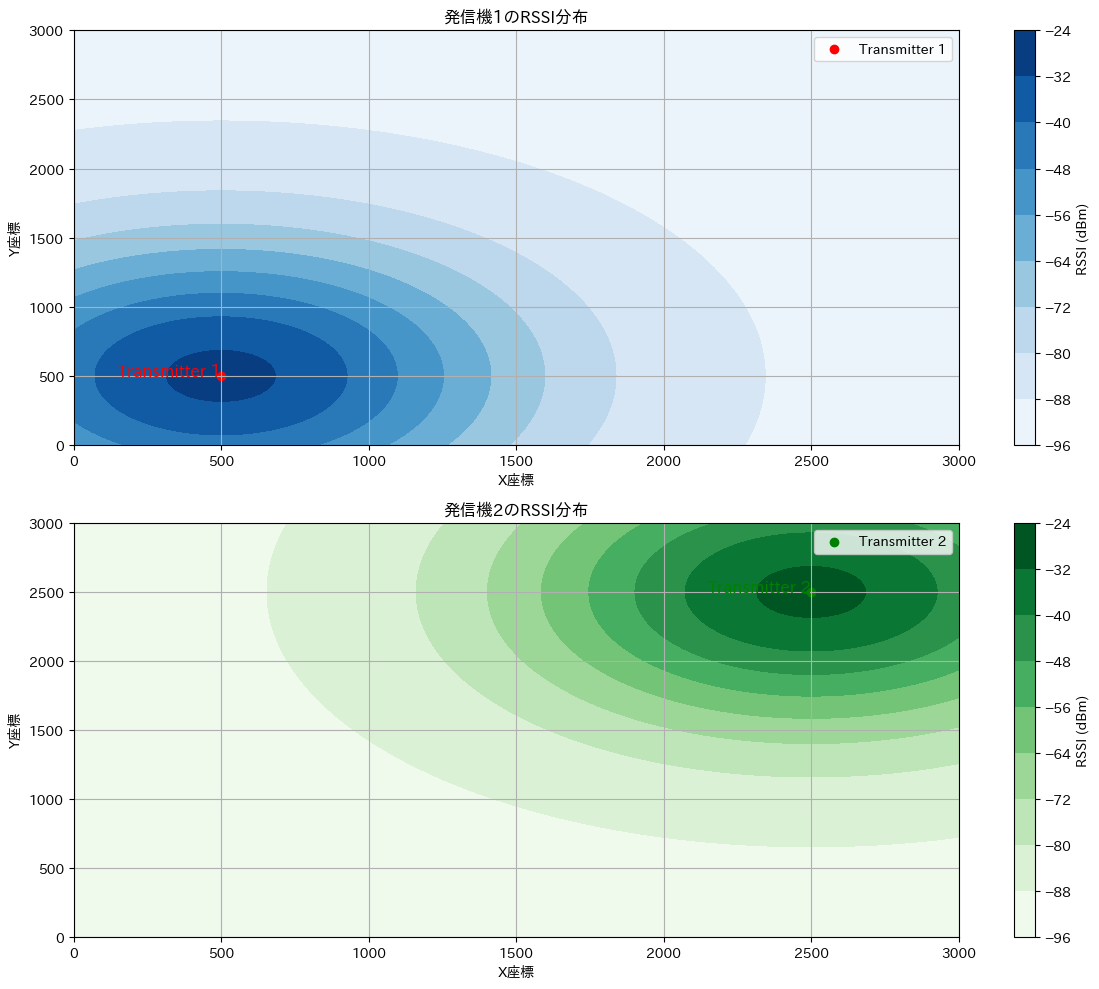

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import japanize_matplotlib

# 3000x3000の座標平面を作成
x = np.linspace(0, 3000, 3000)
y = np.linspace(0, 3000, 3000)
X, Y = np.meshgrid(x, y)

# 電波発信端末の座標とGMMのパラメータを設定
transmitter_1 = [500, 500]  # 端末1の平均 (中心座標)
transmitter_2 = [2500, 2500]  # 端末2の平均 (中心座標)

covariance_matrix_1 = [[500000, 0], [0, 500000]]  # 端末1の共分散行列
covariance_matrix_2 = [[500000, 0], [0, 500000]]  # 端末2の共分散行列

# 各発信端末のガウス分布を計算
rv1 = multivariate_normal(mean=transmitter_1, cov=covariance_matrix_1)
rv2 = multivariate_normal(mean=transmitter_2, cov=covariance_matrix_2)

# 各座標点での確率密度関数を計算
Z1 = rv1.pdf(np.dstack((X, Y)))
Z2 = rv2.pdf(np.dstack((X, Y)))

# 確率密度をRSSI値に変換
# RSSIの範囲を設定
RSSI_max = -30  # dBm
RSSI_min = -90  # dBm

# Z1とZ2の最大値
Z1_max = np.max(Z1)
Z2_max = np.max(Z2)

# 確率密度をRSSIにスケーリング
# 確率密度のグラデーションをそのままRSSI値に変換
RSSI1 = RSSI_min + (Z1 / Z1_max) * (RSSI_max - RSSI_min)
RSSI2 = RSSI_min + (Z2 / Z2_max) * (RSSI_max - RSSI_min)


def get_rssi(x, y, X, Y, RSSI):
    # 座標の範囲チェック
    if x < X.min() or x > X.max() or y < Y.min() or y > Y.max():
        return None  # 座標が範囲外の場合はNoneを返す

    # 座標に最も近いインデックスを取得
    idx_x = (np.abs(X[0, :] - x)).argmin()
    idx_y = (np.abs(Y[:, 0] - y)).argmin()

    return RSSI[idx_y, idx_x]


# テスト用
coords = [(500, 500), (2500, 2500), (1500, 1500), (3000, 3000)]

for x, y in coords:
    rssi1 = get_rssi(x, y, X, Y, RSSI1)
    rssi2 = get_rssi(x, y, X, Y, RSSI2)
    print(f"Coordinates: ({x}, {y}) -> RSSI1: {rssi1} dBm, RSSI2: {rssi2} dBm")

# プロット
plt.figure(figsize=(12, 10))

# 発信機1のRSSI分布をプロット
plt.subplot(2, 1, 1)
plt.contourf(X, Y, RSSI1, cmap="Blues")
plt.colorbar(label="RSSI (dBm)")
plt.scatter(
    transmitter_1[0], transmitter_1[1], color="red", marker="o", label="Transmitter 1"
)
plt.text(
    transmitter_1[0],
    transmitter_1[1],
    "Transmitter 1",
    color="red",
    fontsize=12,
    ha="right",
)
plt.xlabel("X座標")
plt.ylabel("Y座標")
plt.title("発信機1のRSSI分布")
plt.legend()
plt.grid(True)

# 発信機2のRSSI分布をプロット
plt.subplot(2, 1, 2)
plt.contourf(X, Y, RSSI2, cmap="Greens")
plt.colorbar(label="RSSI (dBm)")
plt.scatter(
    transmitter_2[0], transmitter_2[1], color="green", marker="o", label="Transmitter 2"
)
plt.text(
    transmitter_2[0],
    transmitter_2[1],
    "Transmitter 2",
    color="green",
    fontsize=12,
    ha="right",
)
plt.xlabel("X座標")
plt.ylabel("Y座標")
plt.title("発信機2のRSSI分布")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()